# Histogram of IP counts (same timestamp and same app)

In [2]:
import os
import pickle

import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

TRAIN_ROWS = 184903890

def datetime_to_deltas(series, delta=np.timedelta64(1, 's')):
    t0 = series.min()
    return ((series-t0)/delta).astype(np.uint32)

def format_series(x):
    w = 600
    n = x.max()+1
    l = int(np.ceil(n/float(w))*w)
    c = np.zeros(l, dtype=np.float32)
    np.add.at(c, x.values, 1)    
    return c.reshape((-1,w))

In [3]:
with open(os.path.join('cache/train_test_base.pkl'), 'rb') as f:
    df = pickle.load(f)        
    df = df.reset_index(drop=True)


In [31]:
df['t'] = datetime_to_deltas(df.click_time)


In [8]:
train_df = df.iloc[:TRAIN_ROWS]    

In [23]:
import seaborn as sns

def plot_ips_by_app(df, app):    
    df_app = df[df.app==app]

    # how many different IPs per second
    x_app = df_app[['ip', 't']].groupby(['t'])[['ip']].count().reset_index().rename(index=str, columns={'t': 't_delta'})

    # set 0's across all time steps
    x = np.zeros((df_app['t'].max()+1,), dtype=np.uint16)

    # set counts where different than 0
    x[x_app.t_delta.values.ravel()] = x_app.ip.values

    x_app_t = df_app[df_app.is_attributed==1][['ip', 't']].groupby(['t'])[['ip']].count().reset_index().rename(index=str, columns={'t': 't_delta'})

    # initialize with all zeros for all time steps
    xt = np.zeros((df_app['t'].max()+1,), dtype=np.uint16)

    # set counts 
    xt[x_app_t.t_delta.values.ravel()] = x_app_t.ip.values
    
    nrows = 3
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(9, 6))
    idx = 0

    #axes[0][0].invert_yaxis()
    #axes[0][0].set_yticks(np.arange(0, 144*4, 144), False)
    #axes[0][0].set_xticks(np.arange(0, 60*10, 60), False)
    
    ax0, ax1, ax2 = axes
    ax0.set_title("app={}, is_attributed=False".format(app))
    sns.distplot(x, ax=ax0)
    
    ax1.set_title("app={}, is_attributed=True".format(app))
    sns.distplot(x[xt==1], ax=ax1)
    
    sns.distplot(x, ax=ax2)
    sns.distplot(x[xt==1], ax=ax2) 

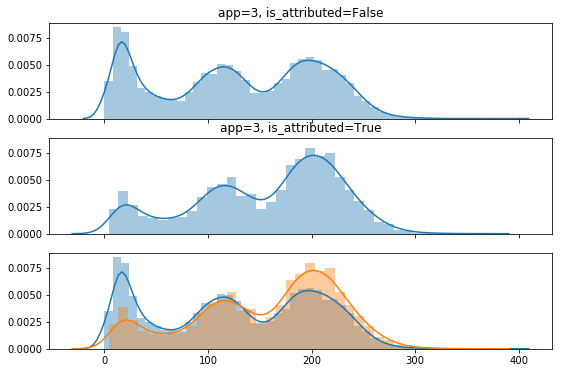

In [24]:
plot_ips_by_app(train_df, 3)

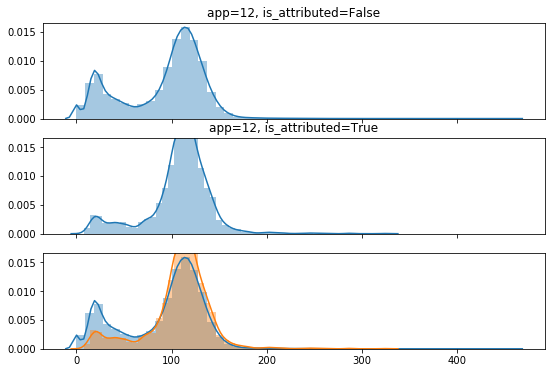

In [25]:
plot_ips_by_app(train_df, 12)

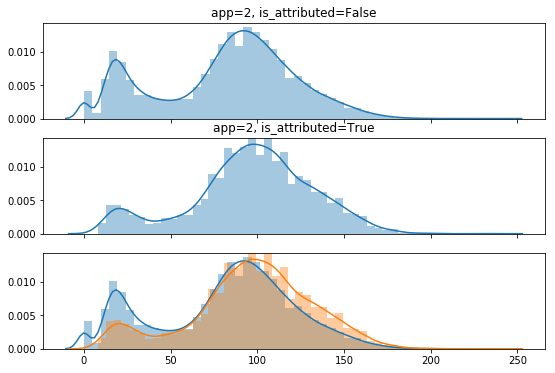

In [26]:
plot_ips_by_app(train_df, 2)

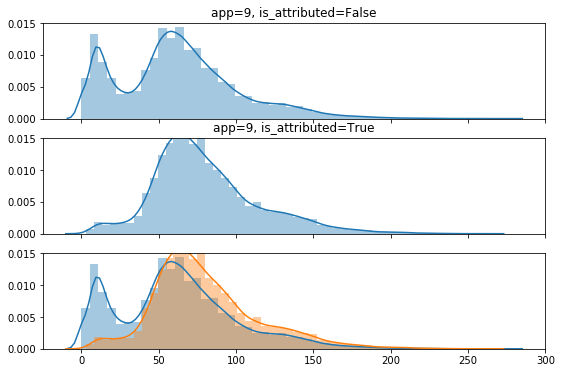

In [27]:
plot_ips_by_app(train_df, 9)

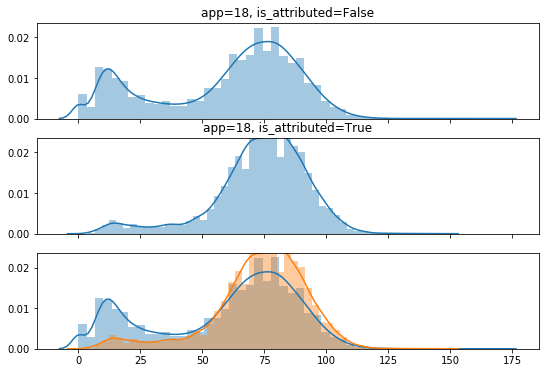

In [28]:
plot_ips_by_app(train_df, 18)

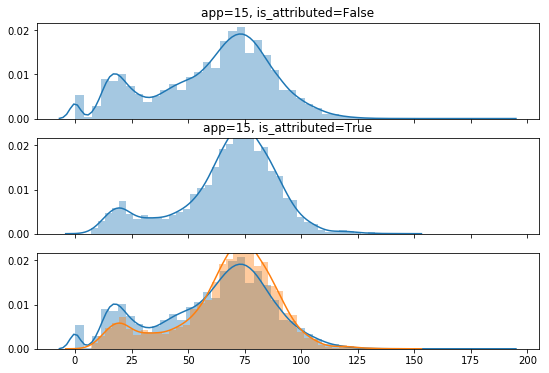

In [29]:
plot_ips_by_app(train_df, 15)

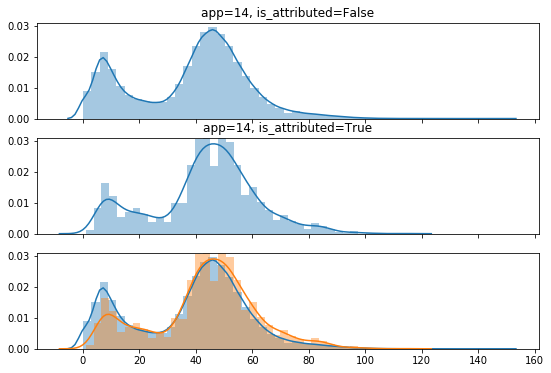

In [30]:
plot_ips_by_app(train_df, 14)